# Multi-Layer Perceptron

## 1. 데이터 설명

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
digits = load_digits() # 1,979개의 이미지 데이터 로드

In [ ]:
print(digits.images[0])

[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]


In [ ]:
print(digits.target[0])

0


In [ ]:
print("# of samples: {}".format(len(digits.images)))

# of samples: 1797


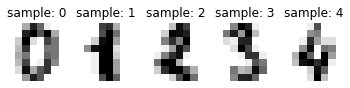

In [ ]:
images_and_labels = list(zip(digits.images, digits.target))
for index, (image, label) in enumerate(images_and_labels[:5]):
  plt.subplot(2, 5, index + 1)
  plt.axis('off')
  plt.imshow(image, cmap=plt.cm.gray_r)
  plt.title('sample: {}'.format(label))

In [ ]:
for i in range(5):
  print("labels for index {} image: {}".format(i, digits.target[i]))

labels for index 0 image: 0
labels for index 1 image: 1
labels for index 2 image: 2
labels for index 3 image: 3
labels for index 4 image: 4


In [ ]:
digits.images[0].shape

(8, 8)

In [ ]:
digits.images.shape

(1797, 8, 8)

In [ ]:
digits.data.shape

(1797, 64)

In [ ]:
digits.images.reshape((-1, 8 * 8)).shape

(1797, 64)

In [ ]:
x = digits.data
y = digits.target

In [ ]:
print(x.shape)
print(y.shape)

(1797, 64)
(1797,)


## 2. MLP classifier 만들기

In [ ]:
import torch
import torch.nn as nn
from torch import optim

[연습]
nn.Sequential을 이용해서 모델 만들기

~~~python
linear (input_dim=64, output_dim=32)
relu
linear (input_dim=32, output_dim=16)
relu
linear (input_dim=16, output_dim=10)
~~~

In [ ]:
model = nn.Sequential(

# Your Code
    
)

In [ ]:
x = torch.tensor(x, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.int64)

In [ ]:
loss_fn = nn.CrossEntropyLoss()

In [ ]:
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [ ]:
losses = []

In [ ]:
for epoch in range(100):
  
  optimizer.zero_grad()
  y_pred = model(x)
  loss = loss_fn(y_pred, y)
  loss.backward()
  optimizer.step()

  if epoch % 10 == 0:
    print('Epoch {:4d}/{} Cost: {:.6f}'.format(
            epoch, 100, loss.item()
        ))

  losses.append(loss.item())


Epoch    0/100 Cost: 2.367211
Epoch   10/100 Cost: 2.024963
Epoch   20/100 Cost: 1.715891
Epoch   30/100 Cost: 1.403826
Epoch   40/100 Cost: 1.107050
Epoch   50/100 Cost: 0.845880
Epoch   60/100 Cost: 0.617052
Epoch   70/100 Cost: 0.457532
Epoch   80/100 Cost: 0.354990
Epoch   90/100 Cost: 0.286686


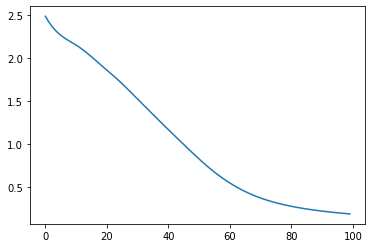

In [ ]:
plt.plot(losses)

## 3. Custom Dataset 만들어서 구현하기

~~~python
# class CustomDataset(torch.utils.data.Dataset): 
    def __init__(self):
    데이터셋의 전처리를 해주는 부분

    def __len__(self):
    데이터셋의 길이. 즉, 총 샘플의 수를 적어주는 부분

    def __getitem__(self, idx): 
    데이터셋에서 특정 1개의 샘플을 가져오는 함수
~~~

In [ ]:
from torch.utils.data import DataLoader
from torch.utils.data import Dataset

In [ ]:
class DigitsDataset(Dataset):
  def __init__(self, x, y):
    # Your Code

  def __len__(self):
    # Your Code
  
  def __getitem__(self, idx):
    # Your Code
    

In [ ]:
# 위에서 구현한 모델
model = nn.Sequential(
    nn.Linear(64, 32),
    nn.ReLU(),
    nn.Linear(32, 16),
    nn.ReLU(),
    nn.Linear(16, 10)   
).cuda()

In [ ]:
x = torch.tensor(digits.data, dtype=torch.float32)
y = torch.tensor(digits.target,dtype=torch.int64)

In [ ]:
digit_data = DigitsDataset(x, y)

In [ ]:
digit_data_loader =  DataLoader(digit_data, batch_size=32)

In [ ]:
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [ ]:
losses = []

In [ ]:
for epoch in range(100):
  epoch_loss = 0
  for x, y in digit_data_loader:
    x = x.cuda()
    y = y.cuda()

    y_pred = model(x)
    loss = loss_fn(y_pred, y)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    epoch_loss += loss.item()
  
  if epoch % 10 == 0:
    print('Epoch {:4d}/{} Cost: {:.6f}'.format(
            epoch, 100, epoch_loss
        ))

  losses.append(epoch_loss)

Epoch    0/100 Cost: 106.847686
Epoch   10/100 Cost: 5.673866
Epoch   20/100 Cost: 2.177435
Epoch   30/100 Cost: 0.910030
Epoch   40/100 Cost: 0.342987
Epoch   50/100 Cost: 0.168209
Epoch   60/100 Cost: 0.097208
Epoch   70/100 Cost: 0.058908
Epoch   80/100 Cost: 0.036035
Epoch   90/100 Cost: 0.021193


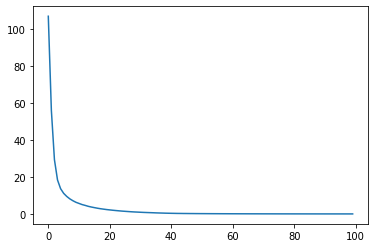

In [ ]:
plt.plot(losses)

## 3. MNIST data와 Class를 이용해서 MLP Classifier 만들기

In [ ]:
import torchvision.datasets as dataset # for loading dataset (mnist)
import torchvision.transforms as transforms # for processing datasets

In [ ]:
# load data
train_data = dataset.MNIST("./", train = True, transform = transforms.ToTensor(), target_transform = None, download = True)
test_data = dataset.MNIST("./", train = False, transform = transforms.ToTensor(), target_transform = None, download = True)

Extracting ./MNIST/raw/train-images-idx3-ubyte.gz to ./MNIST/raw



Extracting ./MNIST/raw/train-labels-idx1-ubyte.gz to ./MNIST/raw


Extracting ./MNIST/raw/t10k-images-idx3-ubyte.gz to ./MNIST/raw


Extracting ./MNIST/raw/t10k-labels-idx1-ubyte.gz to ./MNIST/raw
Processing...
Done!


/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:469: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:141.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [ ]:
batch_size = 256

In [ ]:
train_loader = torch.utils.data.DataLoader(train_data, batch_size = batch_size, shuffle = True)
test_loader = torch.utils.data.DataLoader(test_data, batch_size = batch_size)

[연습]

~~~python
linear (input_dim=28 * 28, output_dim=32)
relu
linear (input_dim=32, output_dim=16)
relu
linear (input_dim=16, output_dim=10)
~~~

In [ ]:
class MLP(nn.Module):
  def __init__(self):
    super().__init__() # Initializing nn.Module
    # Your Code


  def forward(self, x):
    # Your Code


    return x

In [ ]:
model = MLP().cuda()

In [ ]:
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [ ]:
for epoch in range(20):
  epoch_loss = 0
  for x, y in train_loader:
    # data
    x = x.view((-1, 28*28))
    x = x.cuda()
    y = y.cuda()
    
    # Model Prediction and Loss
    pred = model(x)
    loss = loss_fn(pred, y)

    # Optimization Step
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    epoch_loss += loss.item()

  print('Epoch {:4d}/{} Cost: {:.6f}'.format(epoch, 20, epoch_loss / len(train_loader)))
  losses.append(epoch_loss / len(train_loader))

Epoch    0/20 Cost: 0.904191
Epoch    1/20 Cost: 0.316518
Epoch    2/20 Cost: 0.265177
Epoch    3/20 Cost: 0.233938
Epoch    4/20 Cost: 0.210952
Epoch    5/20 Cost: 0.191563
Epoch    6/20 Cost: 0.174354
Epoch    7/20 Cost: 0.160143
Epoch    8/20 Cost: 0.148584
Epoch    9/20 Cost: 0.139402
Epoch   10/20 Cost: 0.130538
Epoch   11/20 Cost: 0.123458
Epoch   12/20 Cost: 0.117594
Epoch   13/20 Cost: 0.112032
Epoch   14/20 Cost: 0.107255
Epoch   15/20 Cost: 0.101212
Epoch   16/20 Cost: 0.097052
Epoch   17/20 Cost: 0.092433
Epoch   18/20 Cost: 0.089383
Epoch   19/20 Cost: 0.085923


In [ ]:
correct = 0
total = 0

prediction_list = []
label_list = []

with torch.no_grad():
  for imges, labels in test_loader:
    imges = imges.reshape( (-1, 28 * 28)).cuda()
    labels = labels.cuda()

    output = model(imges)
    _, prediction_idx = torch.max(output, 1)

    prediction_list.append(prediction_idx)
    label_list.append(label)

    total += labels.size(0)
    correct += (prediction_idx == labels).sum().float()
  print("Accuracy: {}".format(correct/total))

Accuracy: 0.9648999571800232


### Regularization

In [ ]:
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4, weight_decay=1e-5)